In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **UE22CS342AA2- Data Analytics - Worksheet 2a - Simple Linear and Multiple Linear Regression**

Sanjana S - sanjanasuresh2709@gmail.com

**Academic Excellence Analysis Task**

In today's competitive educational landscape, understanding the factors that contribute to student success is more important than ever. Educators and policymakers are constantly seeking ways to enhance learning outcomes and support students in achieving their full potential. By analyzing various elements that influence academic performance, we can uncover valuable insights and develop effective strategies to improve educational practices.

Your task is to analyze the dataset to uncover the factors influencing academic success. By examining various predictors and their impact on the performance index, you can provide valuable insights that can help educators and students optimize learning strategies.

## Regression

Regression is a statistical method used to model the connection between variables, understanding how changes in one influence another. It's vital for predicting outcomes, finding patterns, and making informed decisions. 

In this worksheet we will be exploring 2 concepts. Namely:

  - Simple Linear Regression
  
  - Multiple Linear Regression
  
 

Before we go any further, let's have a look at the dataset and it's different columns

**Data Dictionary**

The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:
* Learning Hours: The total number of hours spent studying by each student.
* Previous Exam Scores: The scores obtained by students in previous exams.
* Club Participation: Whether the student participates in any club activities (Yes or No).
* Daily Rest Hours: The average number of hours of sleep the student had per day.
* Practice Tests Taken: The number of sample question papers the student practiced.

Target Variable:
* Academic Performance Index: A measure of the overall performance of each student.It represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.


## Data Visualising

Let's visualize this all in the form of a Data Frame

In [1]:
data <- read.csv("/kaggle/input/2a-data/2a-data.csv")
head(data)

Learning_Hours Previous_Exam_Scores Club_Participation Daily_Rest_Hours
1 7              99                   Yes                9               
2 4              82                   No                 4               
3 8              51                   Yes                7               
4 5              52                   Yes                5               
5 7              75                   No                 8               
6 3              78                   No                 9               
  Practice_Tests_Taken Academic_Performance_Score
1 1                    91                        
2 2                    65                        
3 2                    45                        
4 2                    36                        
5 5                    66                        
6 6                    61

In [2]:
summary(data)

 Learning_Hours  Previous_Exam_Scores Club_Participation Daily_Rest_Hours
 Min.   :1.000   Min.   :40.00        Length:10000       Min.   :4.000   
 1st Qu.:3.000   1st Qu.:54.00        Class :character   1st Qu.:5.000   
 Median :5.000   Median :69.00        Mode  :character   Median :7.000   
 Mean   :4.993   Mean   :69.45                           Mean   :6.531   
 3rd Qu.:7.000   3rd Qu.:85.00                           3rd Qu.:8.000   
 Max.   :9.000   Max.   :99.00                           Max.   :9.000   
 Practice_Tests_Taken Academic_Performance_Score
 Min.   :0.000        Min.   : 10.00            
 1st Qu.:2.000        1st Qu.: 40.00            
 Median :5.000        Median : 55.00            
 Mean   :4.583        Mean   : 55.22            
 3rd Qu.:7.000        3rd Qu.: 71.00            
 Max.   :9.000        Max.   :100.00            

## Regression Analysis


### 1. Simple Linear Regression

Educators want to know if previous academic performance is often a strong indicator of future academic success.<br> <br>
**a)** Create a scatter plot between the dependent variable-Previous_Exam_Score and independent variable-Academic_Performance_Score with the best-fit line passing through.            (1 mark)

`geom_smooth()` using formula = 'y ~ x'


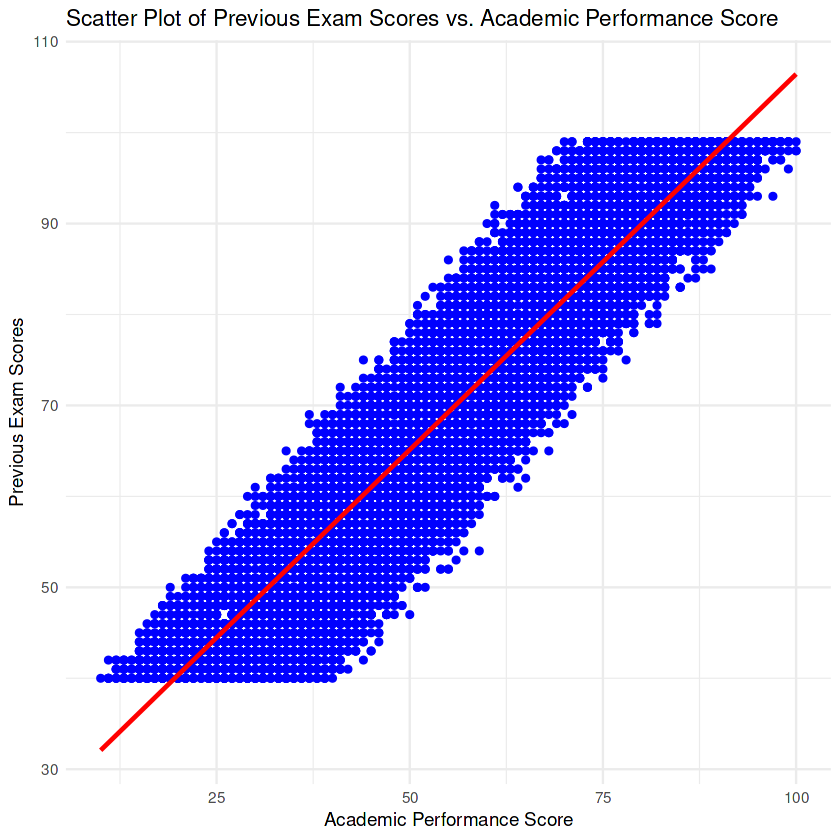

In [5]:
ggplot(data, aes(x = Academic_Performance_Score, y = Previous_Exam_Scores)) +
  geom_point(color = 'blue') + 
  geom_smooth(method = 'lm', color = 'red', se = FALSE) + 
  labs(title = 'Scatter Plot of Previous Exam Scores vs. Academic Performance Score',
       x = 'Academic Performance Score',
       y = 'Previous Exam Scores') +
  theme_minimal()

What do you infer from the graph?             

**b)** Build a linear regression model to predict performance index based on previous scores  (1 mark).

In [6]:

library(ggplot2)

model <- lm(Academic_Performance_Score ~ Previous_Exam_Scores, data = data)

summary(model)



Call:
lm(formula = Academic_Performance_Score ~ Previous_Exam_Scores, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7729  -6.5239  -0.0082   6.3689  19.4346 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -15.181799   0.319605   -47.5   <2e-16 ***
Previous_Exam_Scores   1.013837   0.004465   227.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.744 on 9998 degrees of freedom
Multiple R-squared:  0.8376,	Adjusted R-squared:  0.8376 
F-statistic: 5.156e+04 on 1 and 9998 DF,  p-value: < 2.2e-16


**c)** Check if this model follows OLS assumptions.              (3 marks)


1)The conditional expected value of residuals must be 0.

In [7]:
mean_residuals <- mean(model$residuals)
mean_residuals

[1] 1.975353e-16

As we can see, it is close to 0. Therefore our assumptions holds true.

2)The residuals must follow a normal distribution. Residuals must lie close to the diagonal line in a Q-Q plot.

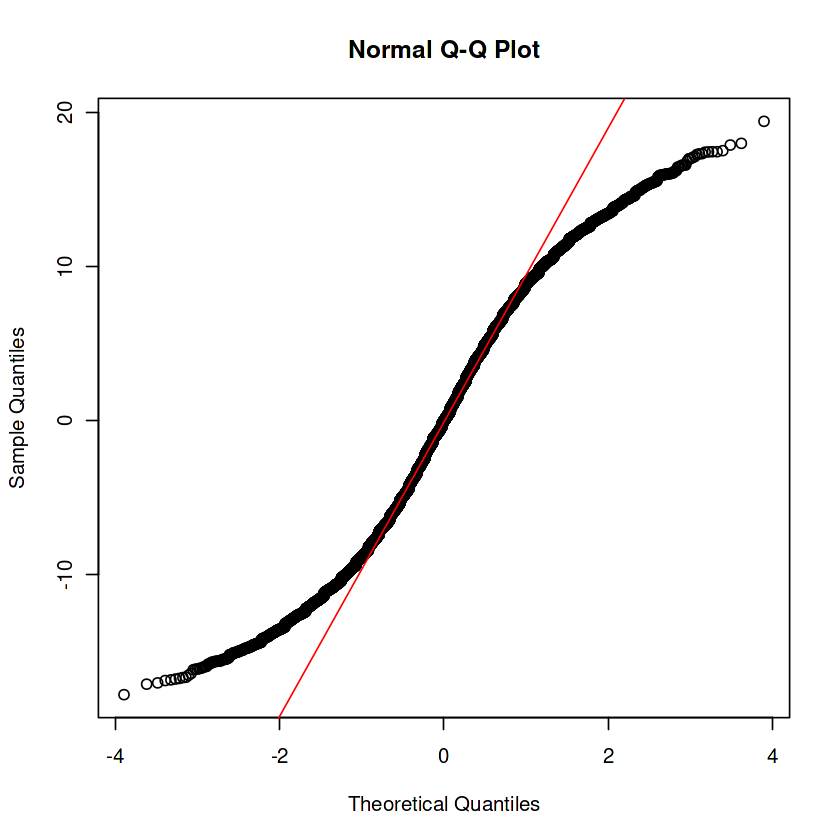

In [9]:
qqnorm(model$residuals)
qqline(model$residuals, col = "red")



3)The variance of residuals is constant for all values of Xi(homoscedasticity).

In [11]:

plot(model$fitted.values, model$residuals,
     xlab = "Fitted Values",
     ylab = "Residuals",
     main = "Residuals vs. Fitted Values")
abline(h = 0, col = "red")


There is no clear pattern observered. therefore our assumptions holds true.

The model follows the OLS assumptions. 

Does the model follow OLS assumptions?          
How did you evaluate whether the linear regression model meets the assumptions required for Ordinary Least Squares (OLS) estimation?
                  


**d)** SLR Validation:                          (1 mark) <br>
Evaluate the overall goodness-of-fit of the linear regression model.
Test whether the overall model is statistically significant using F-statistic.Mention the null and alternative hypotheses.

Let us assume

H0 : Beta1 = 0

H1 : Beta1 Not equal to 0

In [13]:

model <- lm(Academic_Performance_Score ~ Previous_Exam_Scores, data = data)

model_summary



Call:
lm(formula = Academic_Performance_Score ~ Previous_Exam_Scores, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7729  -6.5239  -0.0082   6.3689  19.4346 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -15.181799   0.319605   -47.5   <2e-16 ***
Previous_Exam_Scores   1.013837   0.004465   227.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.744 on 9998 degrees of freedom
Multiple R-squared:  0.8376,	Adjusted R-squared:  0.8376 
F-statistic: 5.156e+04 on 1 and 9998 DF,  p-value: < 2.2e-16


   value 
51555.11 
(Intercept) 
          0 


The R-squared value of 0.8376 means that approximately 83.76% of the variability in the Academic_Performance_Score is explained by the independent variable Previous_Exam_Scores. This indicates a strong fit of the model to the data.

The F-statistic is very high(5.156e+04), and the p-value(< 2.2e-16) is extremely low. This strongly suggests rejecting the null hypothesis, indicating that the model is statistically significant and that Previous_Exam_Scores has a significant effect on the outcome Academic_Performance_Score.

### 2. Multiple Linear Regression                        (4 marks)

For our Multiple Linear Regression models, we could use all the attributes and try to predict the target variable. But the aim is to always predict the maximum variation in the target, with the minimum variables.

Thus, it's important to identify which features are most important to predict our target variable. Use the help of a correlogram to visually analyze the correlation between different independent variables and the one dependent variable. 


                           Learning_Hours Previous_Exam_Scores
Learning_Hours                1.000000000         -0.012389916
Previous_Exam_Scores         -0.012389916          1.000000000
Club_Participation_Num        0.003872541          0.008369320
Daily_Rest_Hours              0.001245198          0.005944219
Practice_Tests_Taken          0.017463168          0.007888025
Academic_Performance_Score    0.373730351          0.915189141
                           Club_Participation_Num Daily_Rest_Hours
Learning_Hours                        0.003872541      0.001245198
Previous_Exam_Scores                  0.008369320      0.005944219
Club_Participation_Num                1.000000000     -0.023283644
Daily_Rest_Hours                     -0.023283644      1.000000000
Practice_Tests_Taken                  0.013102781      0.003990220
Academic_Performance_Score            0.024524947      0.048105835
                           Practice_Tests_Taken Academic_Performance_Score
Learning_Hours 

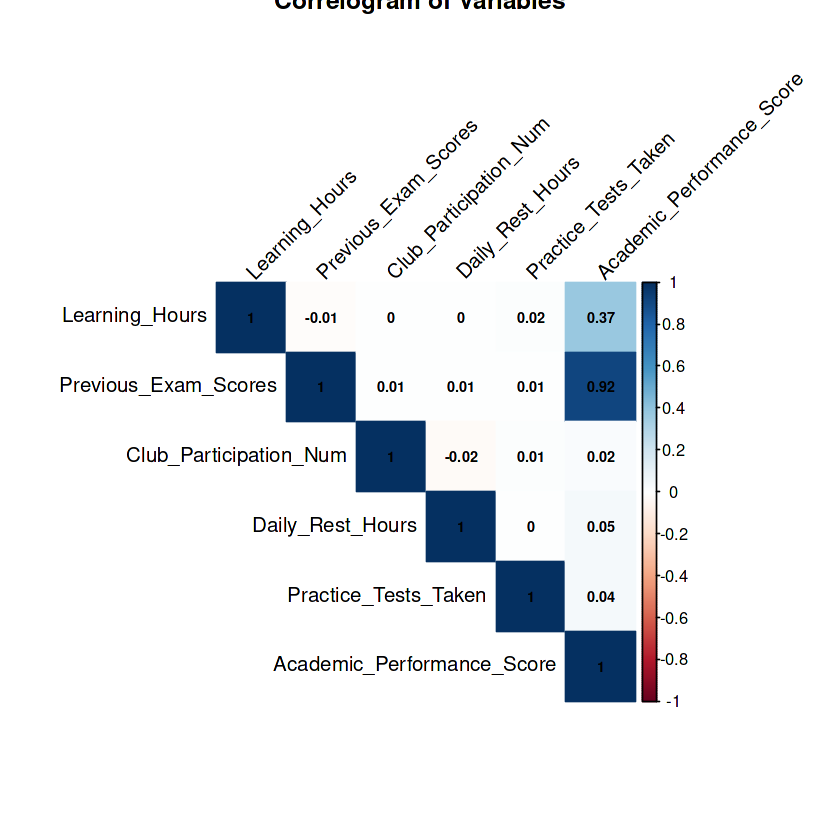

In [15]:
library(dplyr)
library(ggplot2)
library(corrplot)



data <- data %>%
  mutate(Club_Participation_Num = ifelse(Club_Participation == "Yes", 1, 0))

correlation_data <- data %>%
  select(Learning_Hours, Previous_Exam_Scores, Club_Participation_Num, Daily_Rest_Hours, Practice_Tests_Taken, Academic_Performance_Score)


correlation_matrix <- cor(correlation_data, use = "complete.obs")
print(correlation_matrix)


corrplot(correlation_matrix, method = "color", 
         type = "upper", 
         tl.col = "black", 
         tl.srt = 45, 
         addCoef.col = "black", 
         number.cex = 0.7, 
         main = "Correlogram of Variables")


only Previous_Exam_Scores has high correlation with Academic_Perfomance_Score. We will include Learning_Hours as a variable in our Multiple Linear Regression model a correlation of 0.37 which is still not good, but for the sake of constructing Multiple Linear Regression model, we will include it.

**1**) Use different variables to create the Multiple Linear Regression model. <br>

In [16]:
mlr_model <- lm(Academic_Performance_Score ~ Previous_Exam_Scores + Learning_Hours, data = data)

summary(mlr_model)


Call:
lm(formula = Academic_Performance_Score ~ Previous_Exam_Scores + 
    Learning_Hours, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4105 -1.5284 -0.0023  1.5230  9.1603 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -29.816790   0.104529  -285.2   <2e-16 ***
Previous_Exam_Scores   1.019123   0.001317   773.8   <2e-16 ***
Learning_Hours         2.857637   0.008821   323.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.284 on 9997 degrees of freedom
Multiple R-squared:  0.9859,	Adjusted R-squared:  0.9859 
F-statistic: 3.488e+05 on 2 and 9997 DF,  p-value: < 2.2e-16


Is there any correlation between independent variables.Why it is important to do this?

Which are the most important variables to predict the Performance Index?



In [17]:
independent_vars <- data %>%
  select(Learning_Hours, Previous_Exam_Scores)


correlation_matrix_indep <- cor(independent_vars, use = "complete.obs")
print(correlation_matrix_indep)

corrplot(correlation_matrix_indep, method = "color", 
         type = "upper", 
         tl.col = "black", 
         tl.srt = 45, 
         addCoef.col = "black", 
         number.cex = 0.7, 
         main = "Correlogram of Independent Variables")


                     Learning_Hours Previous_Exam_Scores
Learning_Hours           1.00000000          -0.01238992
Previous_Exam_Scores    -0.01238992           1.00000000


There is no correlation between the independent variables. It is important to check this as it causes multicollinearity. 

Multi-collinearity can have the following impact on the model:
1. The standard error of estimate of a regression coefficient may be inflated and may result in retaining (not rejecting) of null hypothesis in t-test, resulting in rejection of a statistically significant explanatory variable
2. The sign of the regression coefficient may be different, that is, instead of negative value for regression coefficient, we may have a positive regression coefficient and vice versa
3. Adding/removing a variable or even an observation may result in large variation in regression coefficient estimates 

**Good job with the analysis!**

Thank you.